<center><h1>Mini Project 1</h1></center>
<hr />

# Part A: Original feature space and Euclidean distance

Given the dataset with four-classes (you can download from the [link](http://vigir.ee.missouri.edu/~gdesouza/ece7720/Homework/data_class4.mat) provided on Canvas as .mat) where each class follows a specific distribution:

In [78]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from math import pi

In [2]:
mat = loadmat(os.path.join("data", "data_class4.mat"))
data = mat["Data"][0]

In [3]:
C = data.shape[0]
C

4

In [4]:
data[0].shape

(2, 400)

In [5]:
N = data[0].shape[1]

- There are 4 classes, $C = 4$ and $c = 1,...,C$.
- Each class has 400 patterns/samples/vectors, $N = 400$.
- Each sample $\vec{x_i}$ is a 2-d vector, $i=1,...,N$.

## 1. Estimate the mean and covariance of each class distribution using a library function (i.e. Matlab toolbox, or Python statistics package, etc.). Report on their values.

### Compute means $\mu$

$$\vec{\mu_c}\mathbf(x) = \frac{1}{N}\sum_{i=1}^{N}\vec{x_i}$$

In [6]:
means = []
for c in range(C):
    mu = np.mean(data[c], axis=1)
    means.append(mu)
    print(f"mu {c} = {mu}")
means = np.array(means)

mu 0 = [9.93166666 5.04771704]
mu 1 = [ 6.89476702 -3.06678779]
mu 2 = [-1.96618141 -2.05252646]
mu 3 = [-1.85830966  2.96492564]


### Compute variances $\sigma^2$

#### Population Variance
$$ \vec{\sigma^2_c}(\mathbf{x}) = \frac{1}{N} \sum_{i=1}^{N}(\vec{x_i}-\vec{\mu_c})^2 $$

- $\sigma^2_c$ is the population variance of class $c$.

Note: `numpy` uses population variance.

#### Sample Variance
$$ \vec{s^2_c}(\mathbf{x}) = \frac{1}{N-1} \sum_{i=1}^{N}(\vec{x_i}-\vec{\mu_c})^2 $$

In [7]:
variances = []
for c in range(C):
    var = np.var(data[c], axis=1)
    variances.append(var)
    print(f"variance {c} = {var}")
variances = np.array(variances)

variance 0 = [2.92146471 4.13568211]
variance 1 = [1.90173984 2.0304472 ]
variance 2 = [6.68397339 1.1715928 ]
variance 3 = [1.89887304 0.66315154]


In [8]:
1/(N) * np.sum((data[c].T - means[c])**2, axis=0)

array([1.89887304, 0.66315154])

## 2. Plot the data in each of the four classes using different colors and display their eigen-vectors.

## 3. Consider the following four test samples in the table below 1:

| Test Samples | x-value | y-value |
|--------------|---------|---------|
| s1           | 2.3     | 1.9     |
| s2           | 7       | -0.3    |
| s3           | 10      | 0.5     |
| s4           | -1.2    | 0.6     |
<center>Table 1: Test Samples to be classified</center>

### (a) On the same previous plot, display the four test samples.

In [25]:
test_samples = np.array([[2.3, 1.9], [7, -0.3], [10, 0.5], [-1.2, 0.6]])

#### [Ellipse equation](https://math.stackexchange.com/a/2647450)

$$ x(\alpha)=\sigma^2_{c,x} \cos(\alpha)\cos(\theta) − \sigma^2_{c,y} \sin(\alpha)\sin(\theta) + \mu_{c,x} $$
$$ y(\alpha)=\sigma^2_{c,x} \cos(\alpha)\sin(\theta) + \sigma^2_{c,y} \sin(\alpha)\cos(\theta) + \mu_{c,y} $$

- $\theta \in [0, 2\pi]$
- $\alpha \in [0, 2\pi]$ is the rotation radians
- $\sigma^2_{c,d}$ is the variance of class $c$ in dimension $d$
- $\mu_{c,d}$ is the mean of class $c$ in dimension $d$

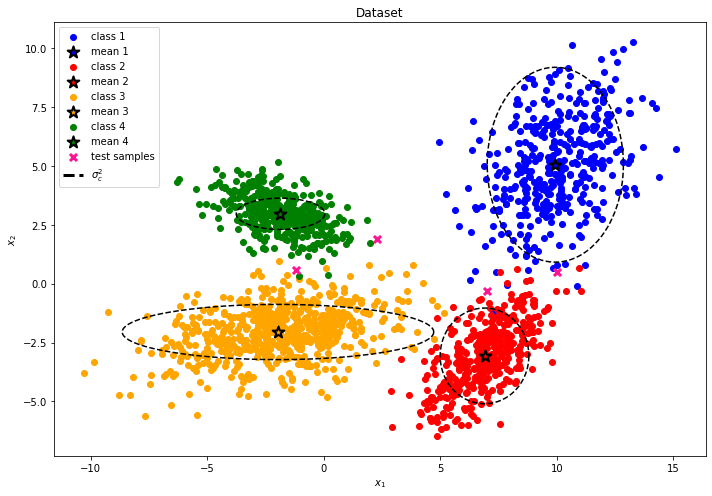

In [105]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
colors = ["blue", "red", "orange", "green"]
for c in range(C):
    # patterns
    ax.scatter(data[c][0], data[c][1], color=colors[c], label=f"class {c+1}")
    # mean
    ax.scatter(means[c, 0], means[c, 1], color=colors[c], marker="*", edgecolor="black", s=150, linewidth=2, label=f"mean {c+1}")
    # variance
    theta = np.linspace(0, 2*pi, 100)
    var_x, var_y = variances[c]
    mean_x, mean_y = means[c]
    alpha = 0 # rotation radians = [0, 2*pi]
    e_X = var_x * np.cos(theta) * np.cos(alpha) - var_y * np.sin(theta) * np.sin(alpha) + mean_x
    e_Y = var_x * np.cos(theta) * np.sin(alpha) - var_y * np.sin(theta) * np.cos(alpha) + mean_y
    ax.plot(e_X, e_Y, color="black", linestyle="--")

# test samples
ax.scatter(test_samples[:, 0], test_samples[:, 1], color="deeppink", marker="x", label="test samples", edgecolor="black", s=50, linewidth=3)
    
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

handles, labels = ax.get_legend_handles_labels()
handles.append(Line2D([0], [0], color="black", linewidth=3, linestyle='--'))
labels.append("$\sigma^2_{c}$")

plt.legend(handles, labels)
plt.title("Dataset")
plt.tight_layout()

### (b) Compute the Euclidean distances d(µi, sj) between the center of each class i = 1, 2, 3, 4 and the test samples j = 1, 2, 3, 4.

$$ d(\mu_i, s_j) = ||\vec{\mu_i} - \vec{s_j}||_2 $$

- $d_{i,c}$ is the distance between center of class $i$ and test sample $j$
- $\vec{s_j}$ is the test sample $j$

In [123]:
J = test_samples.shape[0]
distances = np.zeros((C, J))

def euclidean_distance(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))

for c in range(C):
    for j in range(J):
        distances[c, j] = euclidean_distance(means[c], test_samples[j])

In [124]:
distances

array([[ 8.2553291 ,  6.09858565,  4.5482304 , 11.98733454],
       [ 6.76615584,  2.7687883 ,  4.72910637,  8.88653958],
       [ 5.81573462,  9.13585015, 12.23539492,  2.76096551],
       [ 4.29250578,  9.44083627, 12.11178626,  2.45484111]])

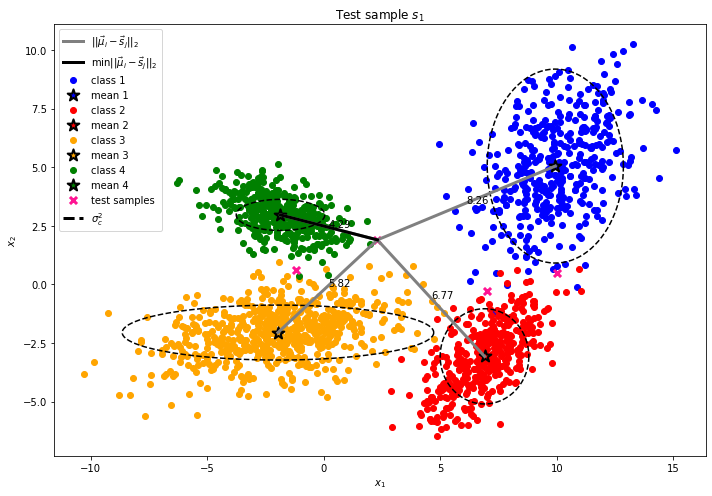

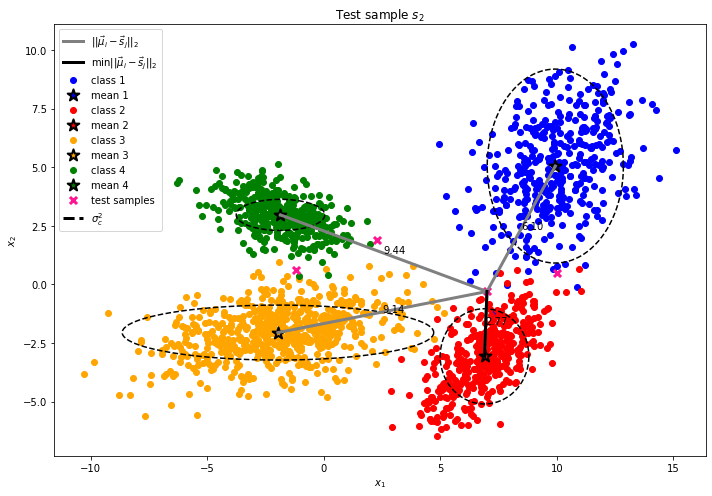

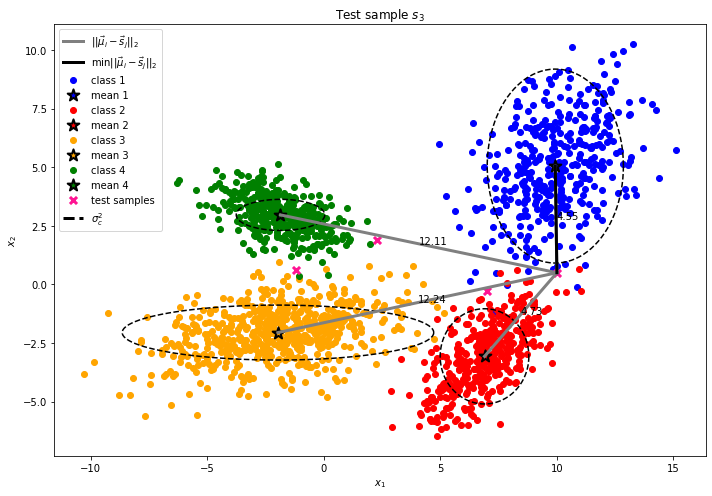

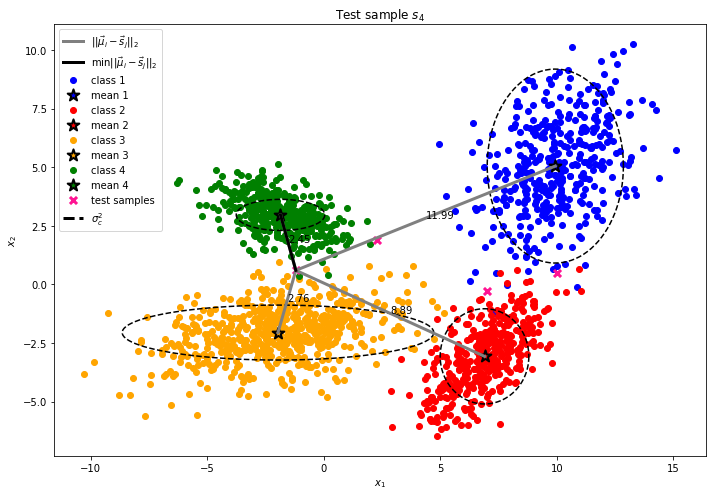

In [192]:
for j in range(J):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    colors = ["blue", "red", "orange", "green"]
    for c in range(C):
        # patterns
        ax.scatter(data[c][0], data[c][1], color=colors[c], label=f"class {c+1}")
        # mean
        ax.scatter(means[c, 0], means[c, 1], color=colors[c], marker="*", edgecolor="black", s=150, linewidth=2, label=f"mean {c+1}")
        # variance
        theta = np.linspace(0, 2*pi, 100)
        var_x, var_y = variances[c]
        mean_x, mean_y = means[c]
        alpha = 0 # rotation radians = [0, 2*pi]
        e_X = var_x * np.cos(theta) * np.cos(alpha) - var_y * np.sin(theta) * np.sin(alpha) + mean_x
        e_Y = var_x * np.cos(theta) * np.sin(alpha) - var_y * np.sin(theta) * np.cos(alpha) + mean_y
        ax.plot(e_X, e_Y, color="black", linestyle="--")

    # test samples
    ax.scatter(test_samples[:, 0], test_samples[:, 1], color="deeppink", marker="x", label="test samples", edgecolor="black", s=50, linewidth=3)

    # euclidean distance
    s_x, s_y = test_samples[j, 0], test_samples[j, 1]
    for c in range(C):
        mu_x, mu_y = means[c, 0], means[c, 1]
        ax.plot([s_x, mu_x], [s_y, mu_y], linewidth=3, color="grey")
        mid_x, mid_y = (s_x + mu_x) / 2, (s_y + mu_y) / 2
        ax.text(mid_x, mid_y, f"{distances[c, j]:.2f}")
    predicted_c = np.argmin(distances[:, j])
    ax.plot([s_x, means[predicted_c, 0]], [s_y, means[predicted_c, 1]], linewidth=3, color="black", label="$\\min ||\\vec \mu_i  - \\vec s_j||_2$")

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Line2D([0], [0], color="black", linewidth=3, linestyle='--'))
    labels.append("$\sigma^2_{c}$")

    handles.insert(0, Line2D([0], [0], color="grey", linewidth=3, linestyle='-'))
    labels.insert(0, "$||\\vec \mu_i  - \\vec s_j||_2$")

    plt.legend(handles, labels)
    plt.title(f"Test sample $s_{j+1}$")
    plt.tight_layout()
    plt.savefig(f"test_samples-euclidean_distances-{j+1}.png")

In [194]:
distances.T

array([[ 8.2553291 ,  6.76615584,  5.81573462,  4.29250578],
       [ 6.09858565,  2.7687883 ,  9.13585015,  9.44083627],
       [ 4.5482304 ,  4.72910637, 12.23539492, 12.11178626],
       [11.98733454,  8.88653958,  2.76096551,  2.45484111]])

### (c) Classify the test samples accordingly and report the results in the following table 2:

| Test Samples | d($\mu_1$,$s_j$) | d($\mu_2$,$s_j$) | d($\mu_3$,$s_j$) | d($\mu_4$,$s_j$) | Class Assignment |
|--------------|--------------|---|---|---|------------------|
| s1 |  8.2553291  | 6.76615584 | 5.81573462 | 4.29250578 | class 4 |
| s2 |  6.09858565 | 2.7687883  | 9.13585015 | 9.44083627 | class 2 |
| s3 |  4.5482304  | 4.72910637 |12.23539492 |12.11178626 | class 1 |
| s4 | 11.98733454 | 8.88653958 | 2.76096551 | 2.45484111 | class 4 |
<center>Table 2: Euclidean distances and classification results in the original feature space</center>

<hr />

## Part B: Whitened space and Euclidean distance

### 1. Apply a whitening transformation to the data in each of the classes according to their own parameters (i.e. Mean and Covariance)


#### Whitened mean

$$ \vec{\mu_W}(\mathbf{x}) =  $$

#### Whitened variance



In [41]:
variances

array([[2.92146471, 4.13568211],
       [1.90173984, 2.0304472 ],
       [6.68397339, 1.1715928 ],
       [1.89887304, 0.66315154]])

In [198]:
data[0].shape

(2, 400)

In [199]:
np.cov(data[0])

array([[2.92878667, 1.34060751],
       [1.34060751, 4.14604723]])

In [14]:
covariance_matrix = np.zeros((C, C, 2))
for c in range(C):
    covariance_matrix[c, c, :] = variances[c]

In [16]:
covariance_matrix.shape

(4, 4, 2)

In [20]:
np.linalg.eig(covariance_matrix[:, :, 0])

(array([2.92146471, 1.90173984, 6.68397339, 1.89887304]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

In [21]:
np.linalg.eig(covariance_matrix[:, :, 1])

(array([4.13568211, 2.0304472 , 1.1715928 , 0.66315154]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

### 2. Repeat questions A.1, A.2 and A.3. but this time using the whitened data and whitened testing samples and report the results in the following table 3:

| Test Samples | d($\mu_1$,$s_j$) | d($\mu_2$,$s_j$) | d($\mu_3$,$s_j$) | d($\mu_4$,$s_j$) | Class Assignment |
|--------------|--------------|---|---|---|------------------|
| s1 | | | | | |
| s2 | | | | | |
| s3 | | | | | |
| s4 | | | | | |
<center>Table  3: Euclidean distances and classification results in the whitened space</center>